In [3]:
import pygeoda
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [6]:
gdfjoined = gpd.read_file( r"exported_data/states_sheldus_all.shp")

In [13]:

gdfjoined['totalAssist'] = gdfjoined['HMAprojAmo']  + gdfjoined['PAprojectA'] + gdfjoined['PDMprojAmo'] + gdfjoined['HAtotal'] + gdfjoined['SBAapprove'] 
gdfjoined['totalAssis2'] = gdfjoined['HMAprojAmo']  + gdfjoined['PAprojectA'] + gdfjoined['PDMprojAmo'] + gdfjoined['HAtotal']

gdfjoined['totalDamage'] = gdfjoined['CropDmg'] + gdfjoined['PropertyDm'] 
gdfjoined['DamageSOVI']  = gdfjoined['HazardCoun'] * gdfjoined['SOVI_SCORE'] 

guerry = pygeoda.open(gdfjoined)


In [14]:
queen_w = pygeoda.queen_weights( guerry )

In [75]:
gdfjoined.columns
#guerry

Index(['STATE', 'STATEABBRV', 'COUNTY', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'SOVI_SCORE', 'RESL_VALUE', 'fips', 'index',
       'HMAprojAmo', 'AdminCostA', 'NumfinalPr', 'CropDmg', 'CropDmg(AD',
       'CropDmgPer', 'PropertyDm', 'Property_1', 'Property_2', 'Injuries',
       'InjuriesPe', 'Fatalities', 'Fataliti_1', 'Duration_D', 'PAprojectA',
       'PDMprojAmo', 'PDMcount', 'PDMNumfina', 'HMAcount', 'HAtotal',
       'HAcount', 'PAcount', 'SBAcount', 'SBAProjcou', 'SBAapprove',
       'HazardCoun', 'x', 'y', 'geometry', 'totalAssist', 'totalAssis2',
       'totalDamage', 'DamageSOVI'],
      dtype='object')

In [12]:
lisa = pygeoda.local_moran(queen_w, guerry['PropertyDm'])
len( lisa.lisa_values() )

3108

In [16]:
data1 = guerry['totalDamage']
data2 = guerry['totalAssis2']
nm = pygeoda.local_bimoran(queen_w, data1, data2)

In [74]:
#nm.lisa_values()

In [73]:
data1 = gdfjoined[ ['totalAssist','totalDamage','DamageSOVI', 'geometry' ] ]
print( data1.columns )
print( gdfjoined.columns)

Index(['totalAssist', 'totalDamage', 'DamageSOVI', 'geometry'], dtype='object')
Index(['STATE', 'STATEABBRV', 'COUNTY', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'SOVI_SCORE', 'RESL_VALUE', 'fips', 'index',
       'HMAprojAmo', 'AdminCostA', 'NumfinalPr', 'CropDmg', 'CropDmg(AD',
       'CropDmgPer', 'PropertyDm', 'Property_1', 'Property_2', 'Injuries',
       'InjuriesPe', 'Fatalities', 'Fataliti_1', 'Duration_D', 'PAprojectA',
       'PDMprojAmo', 'PDMcount', 'PDMNumfina', 'HMAcount', 'HAtotal',
       'HAcount', 'PAcount', 'SBAcount', 'SBAProjcou', 'SBAapprove',
       'HazardCoun', 'x', 'y', 'geometry', 'totalAssist', 'totalAssis2',
       'totalDamage', 'DamageSOVI'],
      dtype='object')


In [51]:
guerry1 = pygeoda.open( data1 )
print( guerry1 )


geoda object:
	 Number of observations: 3108
	 Number of fields: 4
	 Geometry type(s): ('Polygon', 'MultiPolygon')
             field name:      field type (numpy.dtype):
             totalAssist                        float64
             totalDamage                        float64
              DamageSOVI                        float64
                geometry                       geometry



In [52]:

queen_w1 = pygeoda.queen_weights( guerry1 )
#guerry1[['totalAssist'], ['totalDamage'], ['DamageSOVI' ] ]

In [53]:

nm = pygeoda.local_multigeary(queen_w1, guerry1[['totalAssist','totalDamage','DamageSOVI' ] ])

In [76]:
list( nm.lisa_values() )

[0.0615035018968055,
 2.116301218764239,
 0.17072402253442134,
 0.3056562845010305,
 0.22398982581406454,
 0.09236382139843498,
 0.04209996957449757,
 0.22866450921375245,
 0.3361341231322057,
 1.5219968758821276,
 0.1388902491092399,
 1.6422606921528422,
 0.8140309576182084,
 0.3159413789746078,
 0.5070511179239696,
 0.2165404794449867,
 0.0678225656276908,
 0.1945398050664839,
 0.47295789837101027,
 0.1045152489976981,
 0.09402953793436858,
 0.06216880529618463,
 0.72413437870167,
 0.13948377966227532,
 0.47284169122410985,
 0.12181944338730259,
 1.2706147859610308,
 0.2071213089651406,
 0.17418278850924965,
 0.07885245617585579,
 0.1714395460060355,
 0.14115642222379804,
 0.09070618655820721,
 0.301867450895204,
 0.377940788297878,
 0.17178160829478173,
 1.0946333384989162,
 0.6706757874010525,
 0.2547135642763886,
 0.2217023917488734,
 0.3013121218232093,
 0.11957674419568363,
 0.05403885408781897,
 0.11170492014583311,
 0.13072772799850882,
 0.15510692481520758,
 0.075919483169086

In [55]:
pthall      = r"/Users/yuhan/Desktop/paper——revision/Dataprocess/jupitor/exported_data/county_year_sheldus_all.csv"
pthdeclared = r"/Users/yuhan/Desktop/paper——revision/Dataprocess/jupitor/exported_data/county_year_sheldus_declared.csv"

county_year_all      = pd.read_csv( pthall )
county_year_declared = pd.read_csv( pthdeclared )


In [57]:
county_year_all.columns

Index(['STATE', 'STATEABBRV', 'COUNTY', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'SOVI_SCORE', 'RESL_VALUE', 'geometry',
       'fips', 'key', 'Year', 'index', 'HMAprojAmot', 'AdminCostAmt',
       'NumfinalProp', 'CropDmg', 'CropDmg(ADJ 2021)',
       'CropDmgPerCapita(ADJ 2021)', 'PropertyDmg', 'PropertyDmg(ADJ 2021)',
       'PropertyDmgPerCapita(ADJ 2021)', 'Injuries', 'InjuriesPerCapita',
       'Fatalities', 'FatalitiesPerCapita', 'Duration_Days', 'PAprojectAmt',
       'PDMprojAmot', 'PDMcount', 'PDMNumfinalProp', 'HMAcount', 'HAtotal',
       'HAcount', 'PAcount', 'SBAcount', 'SBAProjcount', 'SBAapproved',
       'HazardCount', 'x', 'y'],
      dtype='object')

In [88]:
for yi in county_year_all["Year"].unique():
    county_all_yeari = county_year_all.loc[ county_year_all["Year"]== yi, : ]
    #geometry = [ (xy) for xy in zip(df.Lon, df.Lat)]
    geometryi = gpd.GeoSeries.from_wkt( county_all_yeari['geometry'] )
    county_all_yeari = gpd.GeoDataFrame(county_all_yeari, 
                                        #crs="EPSG:4326", 
                                        geometry= geometryi ) #geometry= county_all_yeari['geometry']
    
    county_all_yeari['totalAssist']  = county_all_yeari['HMAprojAmot']  + county_all_yeari['PAprojectAmt'] + county_all_yeari['PDMprojAmot'] + county_all_yeari['HAtotal'] + county_all_yeari['SBAapproved'] 
    #county_all_yeari['totalAssis2'] = county_all_yeari['HMAprojAmo']  + gdfjoined['PAprojectA'] + gdfjoined['PDMprojAmo'] + gdfjoined['HAtotal']
    county_all_yeari['totalDamage']  = county_all_yeari['CropDmg'] + county_all_yeari['PropertyDmg'] 
    county_all_yeari['DamageSOVI']   = county_all_yeari['HazardCount'] * county_all_yeari['SOVI_SCORE'] 

    pthi = "/Users/yuhan/Desktop/paper——revision/Dataprocess/jupitor/data_year/df_year_all" + str(yi)+ ".shp"
    county_all_yeari.to_file(pthi)
    


/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_60209/3264855348.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)
/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_60209/3264855348.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)
/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_60209/3264855348.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)
/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_60209/3264855348.py:15: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county_all_yeari.to_file(pthi)
/var/folders/t6/8gnslc_j433220_1kgd9hv_c0000gn/T/ipykernel_60209/3264855348.py:15: UserWarning: Column names longer than 10 characters w

In [107]:
yearlist        = []
gearylist       = []
bimoranlist1    = []
bimoranlist2    = []
processed_dfs   = []

for yi in county_year_all["Year"].unique():
    yearlist.append( yi )
    pthi = "/Users/yuhan/Desktop/paper——revision/Dataprocess/jupitor/data_year/df_year_all" + str(yi)+ ".shp"
    gdfjoinedi = gpd.read_file( pthi )
    
    guerryi   = pygeoda.open( gdfjoinedi )
    queen_wi  = pygeoda.queen_weights( guerryi )

    nmi_geary = pygeoda.local_multigeary(queen_wi, guerryi[['totalAssis','totalDamag','DamageSOVI' ] ])
    gdfjoinedi['geary'] = list( nmi_geary.lisa_values() )

    gearylist.append( np.mean( list( nmi_geary.lisa_values() ) ) )

    datai1 = guerryi['totalDamag']
    datai2 = guerryi['totalAssis']
    datai3 = guerryi['DamageSOVI']
    nmi_bimoran1 = pygeoda.local_bimoran( queen_wi, datai1, datai2 )
    nmi_bimoran2 = pygeoda.local_bimoran( queen_wi, datai3, datai2 )

    gdfjoinedi['bimoran1'] = list( nmi_bimoran1.lisa_values() )
    gdfjoinedi['bimoran2'] = list( nmi_bimoran2.lisa_values() )

    bimoranlist1.append( np.mean( list( nmi_bimoran1.lisa_values() ) ) )
    bimoranlist2.append( np.mean( list( nmi_bimoran2.lisa_values() ) ) )

    new = gdfjoinedi[['STATE', 'STATEABBRV', 'COUNTY', 'COUNTYFIPS', 'STCOFIPS', 'POPULATION',
       'BUILDVALUE', 'AGRIVALUE', 'SOVI_SCORE', 'fips', 'Year', 'totalDamag', 'totalAssis',
       'PropertyDm', 'Injuries', 'Fatalities', 
       'geary', 'bimoran1', 'bimoran2']].copy()
    processed_dfs.append( new )
    #county_all_yeari.to_file(pthi)

In [109]:
from functools import reduce
merge_df = reduce(lambda flower, test:    
                  pd.concat( [flower , test],
                             ignore_index= True), processed_dfs)
merge_df.shape

(65268, 19)

In [110]:
pthall = "/Users/yuhan/Desktop/paper——revision/Dataprocess/jupitor/data_year/lise_county_year.csv"
merge_df.to_csv( pthall , index=False)


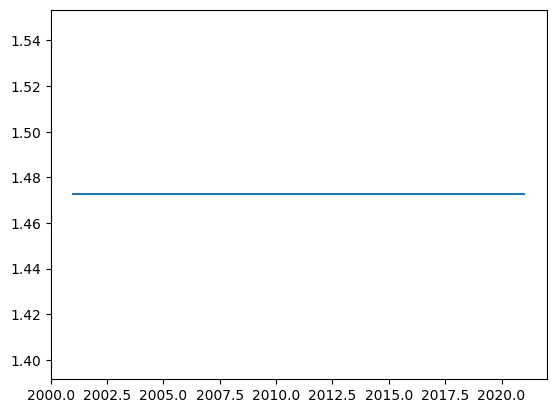

In [114]:
plt.plot( yearlist, gearylist )

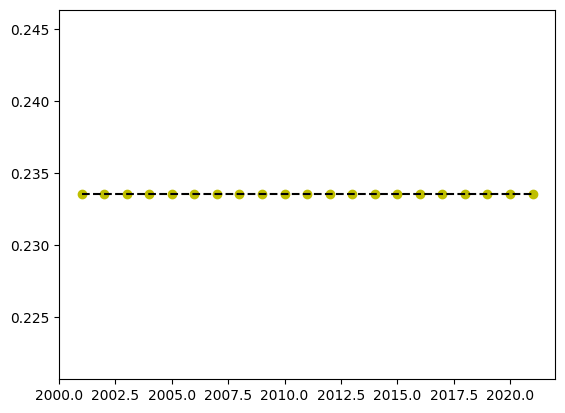

In [113]:
coef = np.polyfit( yearlist, bimoranlist1 ,1)
poly1d_fn = np.poly1d(coef) 

plt.plot( yearlist, bimoranlist1, 'yo', yearlist, poly1d_fn(yearlist), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

#plt.xlim(2000, 2022)
#plt.ylim(0, 0.3)

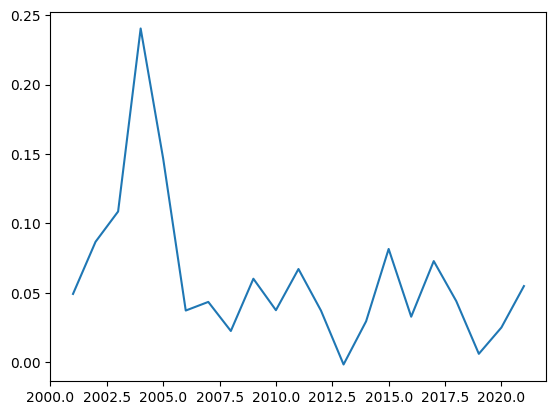

In [103]:

plt.plot( yearlist, bimoranlist2 )